# (Ford GoBike System Data)
## by (Wejdan Homoud Al Ali)

## Investigation Overview

> I investigated the data of Ford GoBike System mainly about the riders gender, birth year and user type.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_ford = pd.read_csv('ford-gobike-system.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> In this visualization I am trying to show the relationship between genders and birth year.
There is nothing noticable in the relationship between genders and birth year, except that all the three genders are between 1980 & 2000.


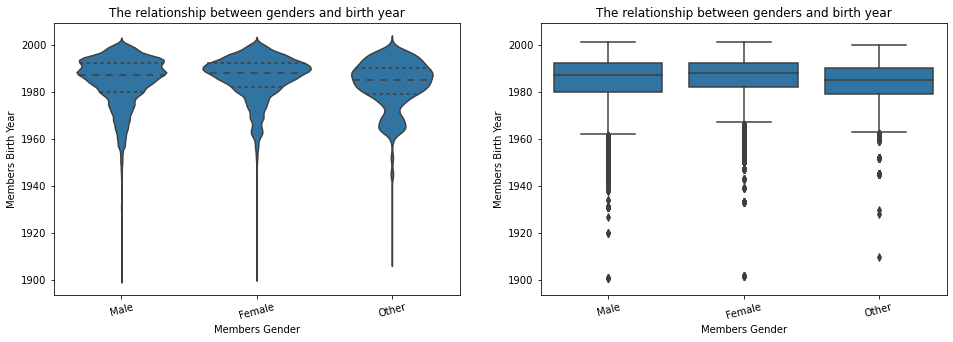

In [6]:
def x_y_t(col1, col2, title):
    ''' This function is to name labels and titles for each visualization'''
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title);
    

genders = ['Male', 'Female', 'Other']

gender = pd.api.types.CategoricalDtype(ordered=True, categories=genders)

df_ford['member_gender'] = df_ford['member_gender'].astype(gender);


plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]


plt.subplot(1, 2, 1)

ax1 = sb.violinplot(data=df_ford, x='member_gender', y='member_birth_year', color=base_color, inner='quartile')
plt.xticks(rotation=15)
x_y_t('Members Gender', 'Members Birth Year', 'The relationship between genders and birth year');


plt.subplot(1, 2, 2)
sb.boxplot(data=df_ford, x='member_gender', y='member_birth_year', color=base_color)
plt.xticks(rotation=15)
x_y_t('Members Gender', 'Members Birth Year', 'The relationship between genders and birth year');
plt.ylim(ax1.get_ylim());

## (Visualization 2)

> Here is another visualization showing the relationship between user type and gender of the members. I noticed that most of the users are subscribers with 158337 counts, and not customers (16561). And most of them are males!

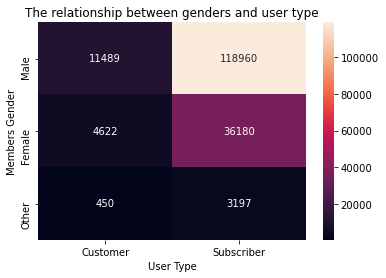

In [8]:
counts = df_ford.groupby(['member_gender', 'user_type']).size()

counts = counts.reset_index(name='count')

counts = counts.pivot(index = 'member_gender', columns = 'user_type', values = 'count')

sb.heatmap(counts, annot = True, fmt = 'd')

x_y_t('User Type', 'Members Gender', 'The relationship between genders and user type');

## (Visualization 3)

> As observed in the previous section, there was nothing noticable in the relationship between Birth Year and Genders, but after adding a third variable (User Type) we can see that the average between the two types for males and females is close to each other, while in (gender = other) subscribers are higher than customers.

> The most interesting thing is that most of users are subscribers and most of them are males born between 80's & 90's.

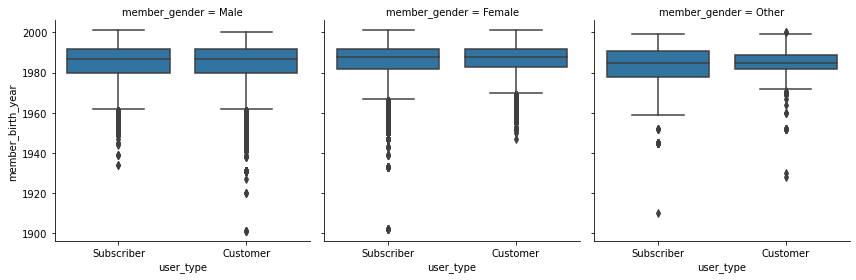

In [6]:
g = sb.FacetGrid(data = df_ford, col = 'member_gender', size = 4)
g.map(sb.boxplot, 'user_type', 'member_birth_year');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!